# Regression Exercise 

California Housing Data

This data set contains information about all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. 

The task is to aproximate the median house value of each block from the values of the rest of the variables. 

 It has been obtained from the LIACC repository. The original page where the data set can be found is: http://www.liaad.up.pt/~ltorgo/Regression/DataSets.html.
 

The Features:
 
* housingMedianAge: continuous. 
* totalRooms: continuous. 
* totalBedrooms: continuous. 
* population: continuous. 
* households: continuous. 
* medianIncome: continuous. 
* medianHouseValue: continuous. 

## The Data

** Import the cal_housing_clean.csv file with pandas. Separate it into a training (70%) and testing set(30%).**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [3]:
data = pd.read_csv('cal_housing_clean.csv')

In [4]:
data.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [5]:
data.describe()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
X_data = data.drop('medianHouseValue', axis=1)
y_label = data['medianHouseValue']
X_data.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
0,41.0,880.0,129.0,322.0,126.0,8.3252
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,52.0,1467.0,190.0,496.0,177.0,7.2574
3,52.0,1274.0,235.0,558.0,219.0,5.6431
4,52.0,1627.0,280.0,565.0,259.0,3.8462


In [7]:
y_label.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: medianHouseValue, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.3, random_state=101)

### Scale the Feature Data

** Use sklearn preprocessing to create a MinMaxScaler for the feature data. Fit this scaler only to the training data. Then use it to transform X_test and X_train. Then use the scaled X_test and X_train along with pd.Dataframe to re-create two dataframes of scaled data.**

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X=X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
X_train_pd = pd.DataFrame(data = scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_pd = pd.DataFrame(data = scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

### Create Feature Columns

** Create the necessary tf.feature_column objects for the estimator. They should all be trated as continuous numeric_columns. **

In [16]:
feat_cols_loop = [tf.feature_column.numeric_column(str(col)) for col in X_train_pd.columns]

In [19]:
age = tf.feature_column.numeric_column('housingMedianAge')
rooms = tf.feature_column.numeric_column('totalRooms')
bedrooms = tf.feature_column.numeric_column('totalBedrooms')
pop = tf.feature_column.numeric_column('population')
households = tf.feature_column.numeric_column('households')
income = tf.feature_column.numeric_column('medianIncome')

In [21]:
feat_cols = [ age,rooms,bedrooms,pop,households,income]
print(feat_cols_loop == feat_cols)

True


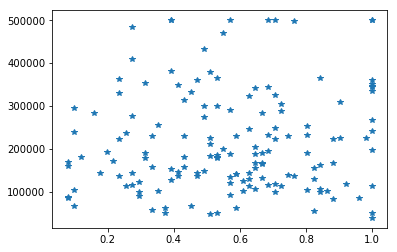

In [79]:
plt.plot(X_train_pd['housingMedianAge'].sample(150, random_state=101), y_train.sample(150, random_state=101), '*')

** Create the input function for the estimator object. (play around with batch_size and num_epochs)**

In [52]:
input_fn = tf.estimator.inputs.pandas_input_fn(x=X_train_pd, y=y_train, batch_size=10, 
                                               num_epochs=10, shuffle=True)

** Create the estimator model. Use a DNNRegressor. Play around with the hidden units! **

In [57]:
model = tf.estimator.DNNRegressor(feature_columns=feat_cols, hidden_units=[6,4,4])
# model = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_model_dir': 'C:\\Users\\motos\\AppData\\Local\\Temp\\tmpm27qozpz', '_session_config': None}


##### ** Train the model for ~1,000 steps. (Later come back to this and train it for more and check for improvement) **

In [58]:
model.train(input_fn=input_fn, steps=25000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\motos\AppData\Local\Temp\tmpm27qozpz\model.ckpt.
INFO:tensorflow:step = 1, loss = 3.46295e+11
INFO:tensorflow:global_step/sec: 520.447
INFO:tensorflow:step = 101, loss = 5.73541e+11 (0.195 sec)
INFO:tensorflow:global_step/sec: 552.951
INFO:tensorflow:step = 201, loss = 5.07337e+11 (0.182 sec)
INFO:tensorflow:global_step/sec: 505.986
INFO:tensorflow:step = 301, loss = 1.50524e+11 (0.198 sec)
INFO:tensorflow:global_step/sec: 540.088
INFO:tensorflow:step = 401, loss = 5.07469e+11 (0.184 sec)
INFO:tensorflow:global_step/sec: 525.911
INFO:tensorflow:step = 501, loss = 6.18161e+11 (0.190 sec)
INFO:tensorflow:global_step/sec: 517.755
INFO:tensorflow:step = 601, loss = 3.63343e+11 (0.193 sec)
INFO:tensorflow:global_step/sec: 547.461
INFO:tensorflow:step = 701, loss = 4.36822e+11 (0.184 sec)
INFO:tensorflow:global_step/sec: 527.298
INFO:tensorflow:step = 801, loss = 7.87793e+11 (0.188 sec)
INFO:te

INFO:tensorflow:global_step/sec: 555.045
INFO:tensorflow:step = 8101, loss = 5.01931e+10 (0.179 sec)
INFO:tensorflow:global_step/sec: 580.789
INFO:tensorflow:step = 8201, loss = 5.27177e+10 (0.175 sec)
INFO:tensorflow:global_step/sec: 551.988
INFO:tensorflow:step = 8301, loss = 2.23705e+10 (0.180 sec)
INFO:tensorflow:global_step/sec: 572.489
INFO:tensorflow:step = 8401, loss = 1.203e+11 (0.178 sec)
INFO:tensorflow:global_step/sec: 512.459
INFO:tensorflow:step = 8501, loss = 6.88318e+10 (0.192 sec)
INFO:tensorflow:global_step/sec: 422.726
INFO:tensorflow:step = 8601, loss = 1.18717e+11 (0.239 sec)
INFO:tensorflow:global_step/sec: 582.474
INFO:tensorflow:step = 8701, loss = 1.35328e+11 (0.170 sec)
INFO:tensorflow:global_step/sec: 512.459
INFO:tensorflow:step = 8801, loss = 3.36164e+10 (0.198 sec)
INFO:tensorflow:global_step/sec: 567.622
INFO:tensorflow:step = 8901, loss = 8.08927e+10 (0.174 sec)
INFO:tensorflow:global_step/sec: 569.24
INFO:tensorflow:step = 9001, loss = 2.06688e+10 (0.17

** Create a prediction input function and then use the .predict method off your estimator model to create a list or predictions on your test data. **

In [59]:
predict_input_fn = tf.estimator.inputs.pandas_input_fn(x=X_test, shuffle=False, num_epochs=1, batch_size=10)

predictions = list(model.predict(input_fn=predict_input_fn))

from sklearn.metrics import mean_squared_error
final_preds = [pred['predictions'][0] for pred in predictions]
mean_squared_error(y_test, final_preds)

INFO:tensorflow:Restoring parameters from C:\Users\motos\AppData\Local\Temp\tmpm27qozpz\model.ckpt-14448


3.2095711674074816e+17

INFO:tensorflow:Restoring parameters from C:\Users\motos\AppData\Local\Temp\tmp7r5nv1e7\model.ckpt-50000


In [42]:
#predictions


** Calculate the RMSE. You should be able to get around 100,000 RMSE (remember that this is in the same units as the label.) Do this manually or use [sklearn.metrics](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) **

In [44]:
#final_preds

In [32]:
type(y_test)

pandas.core.series.Series

517683839.78122622

In [120]:
results_train = model.evaluate(input_fn)

INFO:tensorflow:Starting evaluation at 2018-10-26-20:12:22
INFO:tensorflow:Restoring parameters from C:\Users\motos\AppData\Local\Temp\tmp7ohrneth\model.ckpt-2445
INFO:tensorflow:Finished evaluation at 2018-10-26-20:12:24
INFO:tensorflow:Saving dict for global step 2445: average_loss = 1.11729e+10, global_step = 2445, loss = 1.11714e+11


In [122]:
results_train

{'average_loss': 1.1172898e+10, 'global_step': 2445, 'loss': 1.1171352e+11}

# Great Job!